In [1]:
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt 
from lib.histo_utilities import create_TH1D
import ROOT as rt
from prettytable import PrettyTable

Welcome to JupyROOT 6.12/06


In [2]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In [3]:
fname = '../../../www/FNAL_TB_1811/vr2/Run_1694-1733_Analysis_SiPM_Tile_vr2/TimeResolution_ch14_FullRefScan.txt'
d = []

with open(fname, 'r') as f:
    for l in f.readlines():
        if l[0] == '#':
            continue
        l = l.split()
        d.append([float(l[0]), float(l[1]), l[2], l[3], True if l[4]=='True' else False])
d = np.array(d)

In [4]:
i_best = np.argmin(d[:,0].astype(np.float))
print d[i_best]

['40.46' '0.0' 'LP1_60' 'FL_50' 'True']


In [5]:
l = []
for x in d:
    if float(x[0]) < 150. and not x[3] in l:
        l.append(x[3])

table = PrettyTable(['Var Ref','Var Time', 'Time red [ps]'])
for vref in l:
    sel = d[:,3] == vref
    r = d[sel, 0].astype(np.float)
    n = d[sel, 2]
    i = np.argmin(r)
    table.add_row([vref, n[i], r[i]])

print table

+-----------+-----------+---------------+
|  Var Ref  |  Var Time | Time red [ps] |
+-----------+-----------+---------------+
| gaus_mean |   LP1_50  |     40.98     |
|   IL_20   |   LP1_60  |     47.31     |
|   IL_30   |   LP1_60  |     41.33     |
|   IL_50   |   LP1_60  |     41.12     |
|   IL_60   |   FL_60   |     40.99     |
|  IL_100mV | LP2_300mV |     111.97    |
|   LP1_20  |   FL_60   |     43.12     |
|   LP1_30  |   LP1_60  |     42.43     |
|   LP1_50  |   FL_60   |     40.87     |
|   LP1_60  |   LP1_60  |     40.86     |
| LP1_100mV | LP1_600mV |     125.75    |
|   FL_20   |   FL_60   |     43.02     |
|   FL_30   |   LP1_60  |     41.87     |
|   FL_50   |   LP1_60  |     40.46     |
|   FL_60   |   LP1_60  |     41.06     |
|  FL_100mV | LP1_550mV |     123.91    |
+-----------+-----------+---------------+


In [6]:
def plot_scan(d, vref=None, vtime=None, max_res = 60., ext_amp = 900, AmpCorr='True'):
    if vref==None and vtime==None:
        return
    
    d_res = {}
    for x in d:
        if not x[-1] == AmpCorr:
            continue
        tag = None
        if vtime==None and not vref==None:
            if float(x[0]) < max_res and x[3] == vref:
                tag = x[2][:x[2].find('_')+1]

                if x[2].endswith('mV'):
                    thr = int(x[2][x[2].find('_')+1:-2])
                    tag += 'mV'
                else:
                    thr = int(x[2][x[2].find('_')+1:])
        elif not vtime==None and vref==None:
            if float(x[0]) < max_res and x[2] == vtime:
                tag = x[3][:x[3].find('_')+1]
                
                if tag == 'gaus_':
                    thr = 100
                elif x[3].endswith('mV'):
                    thr = int(x[3][x[3].find('_')+1:-2])
                    tag += 'mV'
                else:
                    thr = int(x[3][x[3].find('_')+1:])
        else: break
        
        if not tag == None:
            if not tag in d_res.keys():
                d_res[tag] = []
            d_res[tag].append([thr, float(x[0]), float(x[1])])
    
    style_dic = {}
    
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.set_xlabel('Constant Threshold [mV]')
    ax1.set_ylabel('Avg time resolution [ps]')
    ax1.set_xlim(0, ext_amp*1.1)
    ax1.grid()
    
    ax2 = ax1.twiny()
    ax2.set_xlabel('Constant Fraction [%]')
    ax2.set_xlim(0, 110)
    ax2.grid()
    
    for t in d_res.keys():
        d_res[t] = np.array(d_res[t])
        a = d_res[t]
        
        var = t[:t.find('_')]
        if not var in style_dic:
            i = len(style_dic.keys())
            style_dic[var] = 'C'+str(i)
        
        if t == 'gaus_':
            ax2.plot(a[:,0], a[:,1], color=style_dic[var], label=var+' peak', marker='o', lw=0)
        elif t.endswith('mV'):
            lw = 2 if a.shape[0]>1 else 0
            marker = '1' if a.shape[0]>1 else 'o'
            ax1.plot(a[:,0], a[:,1], color=style_dic[var], label=var+' CT', lw=lw, ls='--', marker=marker)
        else:
            ax2.plot(a[:,0], a[:,1], color=style_dic[var], label=var+' CF', lw=2, ls='-', marker='2')
    
    if ax1.get_ylim()[1]/ax1.get_ylim()[0] > 2:
        ax1.set_yscale('log')
    
    ax1.legend(loc='lower right', frameon=False)
    ax2.legend(loc='upper right', frameon=False)
    fig.tight_layout()
    
    return d_res

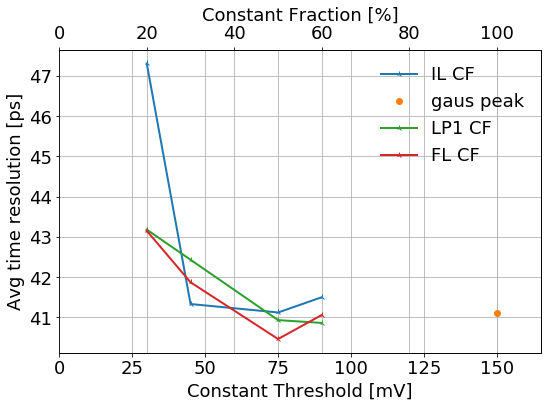

In [7]:
d_res = plot_scan(d, vtime='LP1_60', max_res=50, ext_amp=150)

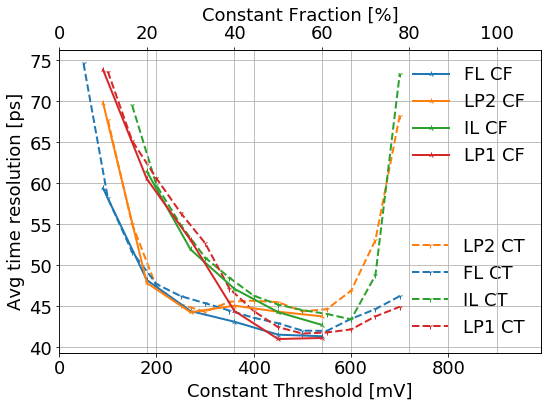

In [8]:
d_res = plot_scan(d, vref='gaus_mean', max_res=80)